## Claim

Exercises from the courese https://www.coursera.org/learn/statistics-for-data-science-python/home/week/4

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## Quiz

Question 1

The weekly earnings of bus drivers are normally distributed with a mean of 395. If only 0.84% of  the  bus  drivers  have  a  weekly  income  of  more  than  429.35,  the  standard  deviation  of  the weekly earnings of the bus drivers is approximately

use Z table [Z Score Table - Z Table and Z score calculation](http://www.z-table.com/)

z = (429.35 - 395)/std, p(>z) = 0.0084, p(<=z) = 1-0.0084 = 0.9916, ==> z = 2.39 = (429.35 - 395)/std ==>

In [3]:
sigma = (429.35 - 395) / 2.39
print(sigma)

14.372384937238502


In [4]:
lst1 = [9, 11, 10,11,10,12, 9,11,12, 9, 10]
lst2 = [10, 13, 10, 13, 12, 9, 11, 12, 12, 12, 13]

stats.ttest_ind(lst1, lst2)

Ttest_indResult(statistic=-2.2164816032790386, pvalue=0.03841461541539729)

## Experiments 

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” 

The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). 

The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. 

Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

In [5]:
import seaborn as sns

In [6]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)

### T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?

> We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

*   One independent, categorical variable with two levels or group
*   One dependent continuous variable
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance

> State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")

C:\Users\Jeremy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

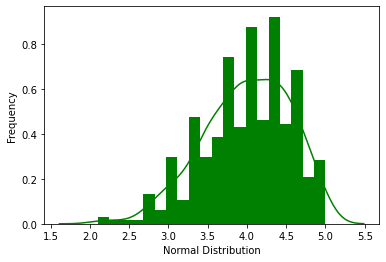

In [7]:
ax = sns.distplot(ratings_df['eval'],
                  bins=20,
                  kde=True,
                  color='green',
                  hist_kws={'linewidth': 15, 'alpha': 1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Let's assume it is normal

> We can use the Levene's Test in Python to check test significance

In [9]:
mask_female = ratings_df['gender'] == 'female'
mask_male = ratings_df['gender'] == 'male'
stats.levene(ratings_df[mask_female]['eval'],
                   ratings_df[mask_male]['eval'], center='mean')

LeveneResult(statistic=0.1903292243529225, pvalue=0.6628469836244741)

> The p-value is greater than 0.05, we assume equality of variance

In [10]:
# T-test
stats.ttest_ind(ratings_df[mask_female]['eval'],
                ratings_df[mask_male]['eval'], equal_var=True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

The p-value < 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender.(there is a difference in evaluation scores between male and females)

### ANOVA: Using the teachers' rating data set, does beauty score for instructors differ by age?

> First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

*   40 years and younger
*   between 40 and 57 years
*   57 years and older

In [13]:
mask_younger = ratings_df['age'] <= 40
mask_between = (ratings_df['age'] > 40) & (ratings_df['age'] < 57)
mask_older = ratings_df['age'] >= 57

ratings_df.loc[mask_younger, 'age_group'] = '40 years and younger'
ratings_df.loc[mask_between, 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[mask_older, 'age_group'] = '57 years and older'

In [14]:
ratings_df.head(3)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof,age_group
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1,40 years and younger
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1,40 years and younger
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1,40 years and younger


> State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


> Test for equality of variance

In [15]:
mask1 = ratings_df['age_group'] == '40 years and younger'
mask2 = ratings_df['age_group'] == 'between 40 and 57 years'
mask3 = ratings_df['age_group'] == '57 years and older'

In [16]:
stats.levene(ratings_df[mask1]['beauty'],
             ratings_df[mask2]['beauty'],
             ratings_df[mask3]['beauty'],
             center='mean')

LeveneResult(statistic=8.60005668392585, pvalue=0.0002153661809934714)

> since the p-value is less than 0.05, we reject the null hypothesis which means the variance are not equal, for the purposes of this exercise, we will move along

> First, separate the three samples (one for each job category) into a variable each.

In [18]:
younger = ratings_df[mask1]['beauty']
between = ratings_df[mask2]['beauty']
older = ratings_df[mask3]['beauty']

In [20]:
# run a one-way ANOVA
f_statistic, p_value = stats.f_oneway(younger, between, older)
print("F_Statistic: {0}, P-value: {1}".format(f_statistic, p_value))

F_Statistic: 17.597558611010122, P-value: 4.3225489816137975e-08


> Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least on of the means differ.

### ANOVA: Using the teachers' rating data set, does teaching evaluation score for instructors differ by age?

In [22]:
# Test for equality of variance
stats.levene(ratings_df[mask1]['eval'],
             ratings_df[mask2]['eval'],
             ratings_df[mask3]['eval'],
             center='mean')

LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

Since the p-value is less than 0.05, we reject the null hypothesis which means the variance are not equal.

In [23]:
younger_eval = ratings_df[mask1]['eval']
between_eval = ratings_df[mask2]['eval']
older_eval = ratings_df[mask3]['eval']

In [24]:
f_stats, p_value = stats.f_oneway(younger_eval, between_eval, older_eval)
print('F statistic: {}, P value: {}'.format(f_stats, p_value))

F statistic: 1.2226327996572204, P value: 0.29540894225417536


**Conclusion**:

> Because the P value calculated is greater than 0.05, we fail to reject the null hypothesis as there is no significant evidence that at least on of the means differ.

we can't reject that there is no significant evidence that the teaching evaluation score for instructors differ by age.

Maybe we need more samples.

### Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?

中文：卡方检测，对于 category data

State the hypothesis:

*   $H\_0:$ The proportion of teachers who are tenured is independent of gender
*   $H\_1:$ The proportion of teachers who are tenured is associated with gender

In [25]:
# Cross-tab table
cont_table = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


> Use the <code>scipy.stats</code> library and set correction equals False as that will be the same answer when done by hand, it returns: 𝜒2 value, p-value, degree of freedom, and expected values.

In [26]:
stats.chi2_contingency(cont_table, correction = True)

(2.20678166999886,
 0.1374050603563787,
 1,
 array([[ 42.95896328,  59.04103672],
        [152.04103672, 208.95896328]]))

2.2 is the 𝜒2 value,
0.137 is the p-value.

> **Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis. As there is no sufficient evidence that teachers are tenured as a result of gender.

### Correlation: Using the teachers rating dataset, Is teaching  evaluation  score correlated with  beauty score?

State the hypothesis:

*   $H\_0:$ Teaching evaluation score is not correlated with beauty score
*   $H\_1:$ Teaching evaluation score is correlated with beauty score

> Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

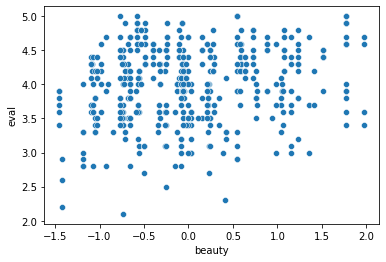

In [29]:
ax = sns.scatterplot(x='beauty', y='eval', data=ratings_df)

In [30]:
stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

(0.18903909084045212, 4.247115419812614e-05)

> **Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  beauty and teaching evaluation score.


## Practice Questions

Question 1: Using the teachers rating data set, does tenure affect teaching evaluation scores?
    
    Use α = 0.05

> State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between tenure and non-tenure teachers")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between tenure and non-tenure teachers")

In [31]:
mask1 = ratings_df['tenure'] == 'yes'
mask2 = ratings_df['tenure'] == 'no'

In [32]:
stats.levene(ratings_df[mask1]['eval'],
             ratings_df[mask2]['eval'],
             center='mean')

LeveneResult(statistic=0.44389295824627123, pvalue=0.5055827160360271)

p-value > 0.05 , we assume equality of variance

In [33]:
stats.ttest_ind(ratings_df[mask1]['eval'],
                ratings_df[mask2]['eval'],
                equal_var=True)

Ttest_indResult(statistic=-2.8046798258451777, pvalue=0.005249471210198792)

The p-value < 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on tenure.

**Tenure does affect teaching evaluation scores**.

Double-click **here** for the solution.

<!-- The answer is below:
scipy.stats.ttest_ind(ratings_df[ratings_df['tenure'] == 'yes']['eval'],
                   ratings_df[ratings_df['tenure'] == 'no']['eval'], equal_var = True)
The p-value is less than 0.05 that means that - we will reject the null hypothesis as there evidence that being tenured affects teaching evaluation scores
-->

### Question 2: Using the teachers rating data set, is there an association between age and tenure?

*   Discretize the age into three groups 40 years and youngers, between 40 and 57 years, 57 years and older (This has already been done for you above.)
*   What is your conclusion at α = 0.01 and α = 0.05?


use Chi-square test
State the hypothesis:

*   $H\_0:$ age is independent of tenure
*   $H\_1:$ age is associated with tenure

In [36]:
cont_tb = pd.crosstab(ratings_df['age_group'], ratings_df['tenure'])
cont_tb

tenure,no,yes
age_group,,
40 years and younger,15,98
57 years and older,25,97
between 40 and 57 years,62,166


In [37]:
stats.chi2_contingency(cont_tb, correction=True)

(8.749576239010711,
 0.012590809706820843,
 2,
 array([[ 24.89416847,  88.10583153],
        [ 26.87688985,  95.12311015],
        [ 50.22894168, 177.77105832]]))

Alpha = 0.05, **Conclusion**: P value(0.0125) is less than 0.05, we reject the null hypothesis. So there is an association between age and tenure.

Alpha = 0.01, P value is greater than 0.01, we failed to reject the null hypothesis.

Double-click **here** for the solution.

<!-- The answer is below:
## use the chi-square function
scipy.stats.chi2_contingency(cont_table, correction = True)
At the α = 0.01, p-value is greater, we fail to reject null hypothesis as there is no evidence of an association between age and tenure
At the α = 0.05, p-value is less, we reject null hypoothesis as there is evidence of an association between age and tenure
-->

### Question 3: Test for equality of variance for beauty scores between tenured and non-tenured instructors

*   Use α = 0.05

In [38]:
stats.levene(ratings_df[mask1]['beauty'],
             ratings_df[mask2]['beauty'],
             center='mean')

LeveneResult(statistic=0.4884241652750455, pvalue=0.4849835158609811)

The p-value is greater than 0.05, we assume equality of variance of two groups.

Double-click **here** for the solution.

<!-- The answer is below:
### use the levene function to find the p-value and conclusion
scipy.stats.levene(ratings_df[ratings_df['tenure'] == 'yes']['beauty'],
                   ratings_df[ratings_df['tenure'] == 'no']['beauty'], 
                   center='mean')
Since the p-value is greater than 0.05, we will assume equality of variance of both groups
-->


### Question 4: Using the teachers rating data set, is there an association between visible minorities and tenure?

*   Use α = 0.05

use Chi-square test
State the hypothesis:

*   $H\_0:$ visible minority is independent of tenure
*   $H\_1:$ visible minority is associated with tenure

In [39]:
count_table = pd.crosstab(ratings_df['minority'], ratings_df['tenure'])
count_table

tenure,no,yes
minority,,
no,92,307
yes,10,54


In [40]:
stats.chi2_contingency(count_table, correction=True)

(1.3675127484429763,
 0.24223968800237178,
 1,
 array([[ 87.90064795, 311.09935205],
        [ 14.09935205,  49.90064795]]))

The p-value is 0.2322, which is greater than 0.05, so we fail to reject the null hypothesis. There is an association between visible minorities and tenure.

Double-click **here** for the solution.

<!-- The answer is below:
## run the chi2_contingency() on the contigency table
scipy.stats.chi2_contingency(cont_table, correction = True)
Since the p-value is greater than 0.05, we fail to reject null hypoothesis as there is evidence of an association between visible minorities and tenure
-->
